### Importing the Important Libraries

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img=cv.imread('/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Ayza Khan/2b540be269029a079c03f5f6d2c8b3a2.jpg')
img.shape

(1024, 681, 3)

# 2. Data Cleaning

In this data cleaning we will get only the faces from images which has two eyes.

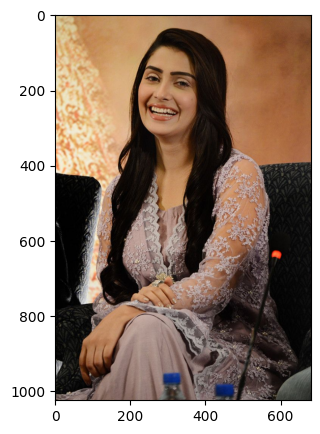

In [4]:
#Sample images
plt.figure(figsize=(5,5))
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

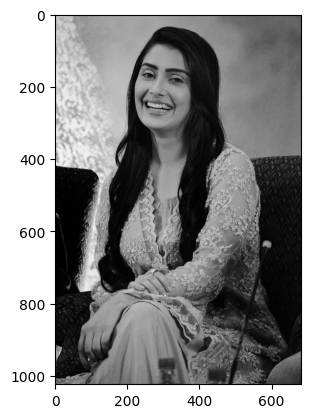

In [5]:
# Convert this image into Gray Scale
gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

In [6]:
#Get the CaseCade
eye_cas_cade=cv.CascadeClassifier('/content/drive/MyDrive/Image Classification/OpenCV HardCodeCase/haarcascade_eye.xml')
face_cas_cade=cv.CascadeClassifier('/content/drive/MyDrive/Image Classification/OpenCV HardCodeCase/haarcascade_frontalface_default.xml')

face=face_cas_cade.detectMultiScale(gray_img,1.3,5)

face

array([[186,  91, 220, 220]], dtype=int32)

It detect the face in the image in which we have x,y,w,h parameters.

## 2.1 Detect the face of the sample image

In [7]:
x,y,w,h=face[0]
x,y,w,h

(186, 91, 220, 220)

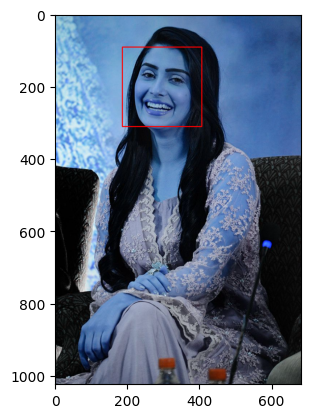

In [8]:
face_img=cv.rectangle(img=img.copy(),pt1=(x,y),pt2=(x+w,y+h),color=(255,0,0),thickness=2)
plt.imshow(face_img)

## 2.2 Detect the eye of sample image

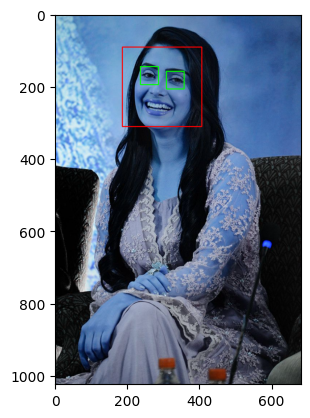

In [9]:
cv.destroyAllWindows()
for (x,y,w,h) in face:
    face_img = cv.rectangle(img=img,pt1=(x,y),pt2=(x+w,y+h),color=(255,0,0),thickness=2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cas_cade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(img=roi_color,pt1=(ex,ey),pt2=(ex+ew,ey+eh),color=(0,255,0),thickness=2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

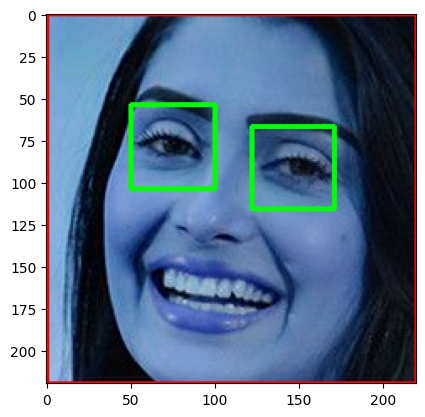

In [10]:
plt.imshow(roi_color,cmap='gray')

## 2.3 Implement on all the images

In [11]:
#Function for all the remaing images
def get_cropped_image_if_2_eyes(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cas_cade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cas_cade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

**Testing on single image again**

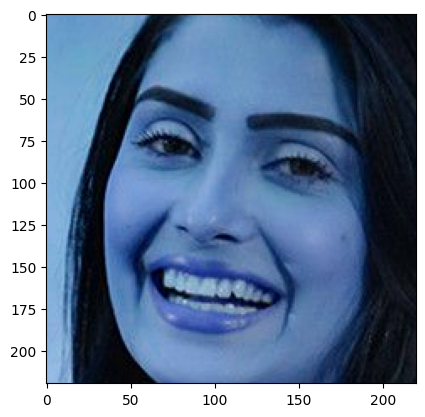

In [12]:
new_image=get_cropped_image_if_2_eyes('/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Ayza Khan/2b540be269029a079c03f5f6d2c8b3a2.jpg')
plt.imshow(new_image)

In [ ]:
path_to_data = "/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset"
path_to_cr_data = "/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/cropped"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

        
img_dirs

['./dataset/Ali Zafar',
 './dataset/Ayesha Umar',
 './dataset/Ayza Khan',
 './dataset/Fahad Khan',
 './dataset/Fahad Mustafa',
 './dataset/Feroze Khan',
 './dataset/Humayo Saeed',
 './dataset/Mahira Khan',
 './dataset/Saba Qamar',
 './dataset/Sajal Ali']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

Ali Zafar
Generating cropped images in folder:  ./dataset/cropped/Ali Zafar
Ayesha Umar
Generating cropped images in folder:  ./dataset/cropped/Ayesha Umar
Ayza Khan
Generating cropped images in folder:  ./dataset/cropped/Ayza Khan
Fahad Khan
Generating cropped images in folder:  ./dataset/cropped/Fahad Khan
Fahad Mustafa
Generating cropped images in folder:  ./dataset/cropped/Fahad Mustafa
Feroze Khan
Generating cropped images in folder:  ./dataset/cropped/Feroze Khan
Humayo Saeed
Generating cropped images in folder:  ./dataset/cropped/Humayo Saeed
Mahira Khan
Generating cropped images in folder:  ./dataset/cropped/Mahira Khan
Saba Qamar
Generating cropped images in folder:  ./dataset/cropped/Saba Qamar
Sajal Ali
Generating cropped images in folder:  ./dataset/cropped/Sajal Ali


# 3. Preprocessing

## 3.1 Getting the correct formate images

In [13]:
import tensorflow as tf
import keras

In [14]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import cv2
import imghdr
import os

In [84]:
data_dir="/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/cropped"

In [85]:
os.listdir(os.path.join(data_dir,'Ayesha Umar'))

['Ayesha Umar4.png',
 'Ayesha Umar3.png',
 'Ayesha Umar5.png',
 'Ayesha Umar2.png',
 'Ayesha Umar7.png',
 'Ayesha Umar8.png',
 'Ayesha Umar6.png',
 'Ayesha Umar10.png',
 'Ayesha Umar11.png',
 'Ayesha Umar12.png',
 'Ayesha Umar13.png',
 'Ayesha Umar17.png',
 'Ayesha Umar20.png',
 'Ayesha Umar21.png',
 'Ayesha Umar23.png',
 'Ayesha Umar28.png',
 'Ayesha Umar27.png',
 'Ayesha Umar29.png',
 'Ayesha Umar35.png',
 'Ayesha Umar32.png',
 'Ayesha Umar34.png',
 'Ayesha Umar33.png',
 'Ayesha Umar36.png',
 'Ayesha Umar37.png',
 'Ayesha Umar41.png',
 'Ayesha Umar40.png',
 'Ayesha Umar39.png',
 'Ayesha Umar38.png',
 'Ayesha Umar43.png',
 'Ayesha Umar42.png',
 'Ayesha Umar45.png',
 'Ayesha Umar44.png',
 'Ayesha Umar47.png',
 'Ayesha Umar46.png',
 'Ayesha Umar48.png',
 'Ayesha Umar50.png',
 'Ayesha Umar49.png',
 'Ayesha Umar54.png',
 'Ayesha Umar53.png',
 'Ayesha Umar55.png',
 'Ayesha Umar57.png',
 'Ayesha Umar60.png',
 'Ayesha Umar58.png',
 'Ayesha Umar62.png',
 'Ayesha Umar61.png',
 'Ayesha Umar65.p

## 3.2 Remove wrong formated images

In [45]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_ext:
        print("Image is not in the ext {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))

Issue with image /content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/new_cropped/Humayo Saeed/image22.jpeg
Issue with image /content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/new_cropped/Humayo Saeed/image29.jpeg
Issue with image /content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/new_cropped/Humayo Saeed/362150.jpg
Issue with image /content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/new_cropped/Humayo Saeed/images6.jpg
Issue with image /content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/new_cropped/Humayo Saeed/images5.jpg
Issue with image /content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/new_cropped/Humayo Saeed/image28.jpeg
Issue with image /content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/new_cropped/Humayo Saeed/image30.jpeg
Issue with image /conten

In [86]:
#Loading data by using keras.utils 
#Pipline
data=keras.utils.image_dataset_from_directory(data_dir)

Found 836 files belonging to 10 classes.


In [87]:
#Access the pipline
data_iterator=data.as_numpy_iterator()

In [88]:
batch=data_iterator.next()

In [89]:
batch

(array([[[[ 14.642643 ,  14.642643 ,  14.642643 ],
          [  9.640625 ,   9.640625 ,   9.640625 ],
          [  7.685547 ,   7.685547 ,   7.685547 ],
          ...,
          [ 38.32617  ,  30.       ,  32.77539  ],
          [ 42.460938 ,  30.865234 ,  34.73047  ],
          [ 44.910156 ,  30.044922 ,  35.       ]],
 
         [[ 11.42207  ,  11.42207  ,  11.42207  ],
          [  7.4609375,   7.4609375,   7.4609375],
          [  5.536129 ,   5.536129 ,   5.536129 ],
          ...,
          [ 38.32617  ,  30.       ,  32.77539  ],
          [ 42.460938 ,  30.865234 ,  34.73047  ],
          [ 44.910156 ,  30.044922 ,  35.       ]],
 
         [[  8.191406 ,   8.191406 ,   8.191406 ],
          [  5.0869102,   5.0869102,   5.0869102],
          [  3.5507812,   3.5507812,   3.5507812],
          ...,
          [ 38.32617  ,  30.       ,  32.77539  ],
          [ 42.460938 ,  30.865234 ,  34.73047  ],
          [ 44.910156 ,  30.044922 ,  35.       ]],
 
         ...,
 
         [[1

In [90]:
len(batch)

2

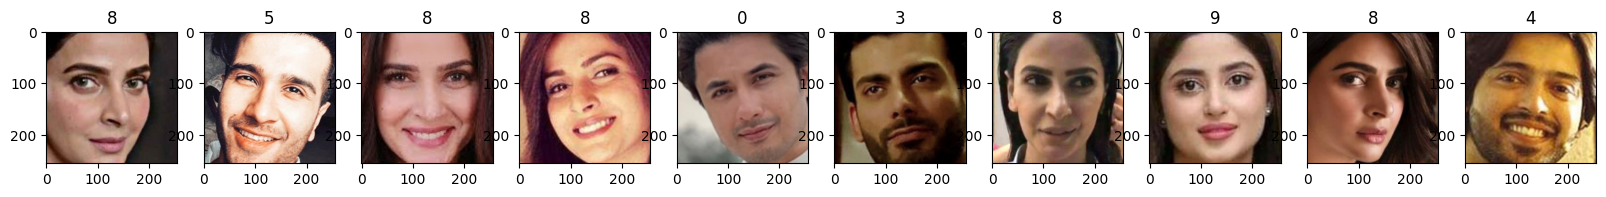

In [91]:
fit,ax=plt.subplots(ncols=10,figsize=(20,20))
for idx,img in enumerate(batch[0][:10]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## 3.3 Data Scaling

In [92]:
#Scale the data
print(batch[0].max())
scale_data=batch[0]/255
print(scale_data.max())

255.0
1.0


In [93]:
#Through Pipline
data=data.map(lambda x,y:(x/255,y))

In [94]:
scaled_iterator=data.as_numpy_iterator()

In [95]:
scaled_iterator.next()[1].max(
)

9

## 3.4 Spliting the data

In [96]:
len(data)

27

In [97]:
train_data=int(len(data)*.7)
val_data=int(len(data)*.2)
test_data=int(len(data)*.1)+1

In [98]:
test_data+val_data+train_data

26

In [99]:
train=data.take(train_data)
val=data.skip(train_data).take(val_data)
test=data.skip(val_data+train_data).take(test_data)

# 4 Building a model

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense,Dropout,MaxPool2D,Flatten

In [101]:
#!pip install -U protobuf==3.8.0

In [102]:
model=Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [103]:
#Compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [105]:
hist=model.fit(train,validation_data=val,epochs=10)

Epoch 1/10
18/18 [==============================] - 57s 3s/step - loss: 2.4458 - accuracy: 0.1319 - val_loss: 2.2126 - val_accuracy: 0.1750
Epoch 2/10
18/18 [==============================] - 48s 3s/step - loss: 2.0653 - accuracy: 0.2795 - val_loss: 1.7847 - val_accuracy: 0.4500
Epoch 3/10
18/18 [==============================] - 49s 3s/step - loss: 1.5682 - accuracy: 0.4826 - val_loss: 1.4178 - val_accuracy: 0.5375
Epoch 4/10
18/18 [==============================] - 45s 2s/step - loss: 1.0270 - accuracy: 0.6476 - val_loss: 0.8706 - val_accuracy: 0.7312
Epoch 5/10
18/18 [==============================] - 44s 2s/step - loss: 0.6077 - accuracy: 0.8073 - val_loss: 0.7719 - val_accuracy: 0.7500
Epoch 6/10
18/18 [==============================] - 50s 3s/step - loss: 0.3793 - accuracy: 0.8941 - val_loss: 0.5689 - val_accuracy: 0.8375
Epoch 7/10
18/18 [==============================] - 45s 2s/step - loss: 0.2350 - accuracy: 0.9288 - val_loss: 0.4671 - val_accuracy: 0.8562
Epoch 8/10
18/18 [==

## 4.1 Performance check

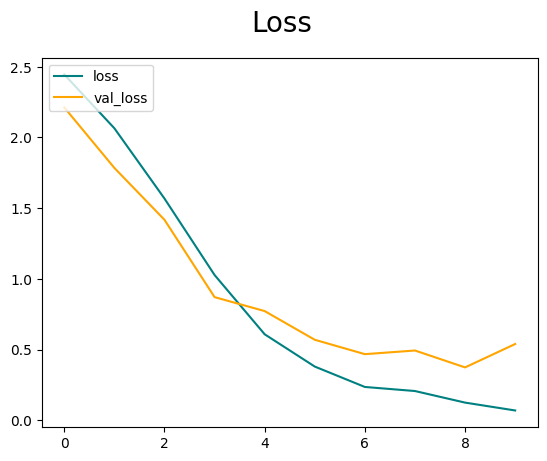

In [106]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

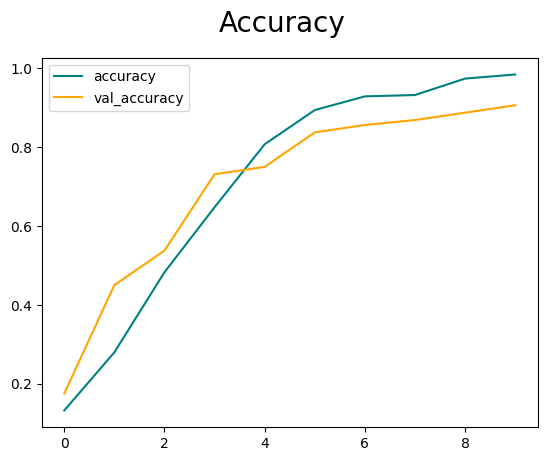

In [107]:
#Accuracy plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4.2 Prediction

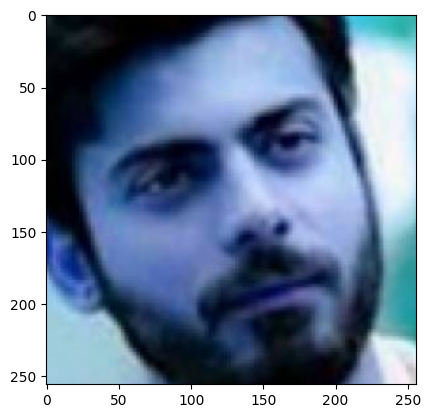

1/1 [==============================] - 0s 193ms/step


array([[1.7879687e-08, 9.0641521e-08, 2.5021450e-06, 9.9921155e-01,
        7.7483535e-04, 9.9217277e-06, 8.8991742e-10, 3.8424548e-07,
        4.4220269e-07, 2.5452940e-07]], dtype=float32)

In [110]:
img1=cv2.imread('/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/cropped/Fahad Khan/Fahad Khan103.png')
img1 = tf.image.resize(img1, (256,256))
plt.imshow(img1.numpy().astype(int))
plt.show()
yhat=model.predict(np.expand_dims(img1/255,0))
yhat

In [111]:
if yhat[0][0]>0.5:
  print("This is Ali Zafar's Picture")
elif yhat[0][1]>0.5:
  print("This is Ayesha Umar's Picture")
elif yhat[0][2]>0.5:
  print("This is Ayza Khan's Picture")
elif yhat[0][3]>0.5:
  print("This is Fahad Khan's Picture")
elif yhat[0][4]>0.5:
  print("This is Fahad Mustafa's Picture")
elif yhat[0][5]>0.5:
  print("This is Feroze Khan's Picture")
elif yhat[0][6]>0.5:
  print("This is Humayo Saeed's Picture")
elif yhat[0][7]>0.5:
  print("This is Mahira Khan's Picture")
elif yhat[0][8]>0.5:
  print("This is Saba Qamar's Picture")
elif yhat[0][9]>0.5:
  print("This is Sajal Ali's Picture")
else:
  print("Not Recognized this Picture:", "Try Again")

This is Fahad Khan's Picture
